## Analysing textual features

In [1]:
import keras
import re
import numpy as np
import pandas as pd

import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
    
%matplotlib inline

Using TensorFlow backend.


In [2]:
from methods.baseline import Baseline
from methods.experiments import Experiment
from methods.evaluation import Evaluation
from methods.retrieval import Retrieval

In [3]:
MAX_SEQUENCE_LENGTH_T = 100 # 40
MAX_SEQUENCE_LENGTH_D = 100 # 200
EMBEDDING_DIM = 300
MAX_NB_WORDS = 2000

In [4]:
DOMAIN = 'eclipse'
DIR = 'data/processed/{}'.format(DOMAIN)
DIR_PAIRS = 'data/normalized/{}'.format(DOMAIN)
DATASET = os.path.join('data/normalized/{}'.format(DOMAIN), '{}.csv'.format(DOMAIN))

In [5]:
df_train_pair = pd.read_csv(os.path.join(DIR_PAIRS, '{}_pairs.csv'.format(DOMAIN)))
baseline = Baseline(DIR, DATASET, MAX_SEQUENCE_LENGTH_T, MAX_SEQUENCE_LENGTH_D)
evaluation = Evaluation(verbose=0)
retrieval = Retrieval()
experiment = Experiment(baseline, evaluation)

In [6]:
experiment.set_retrieval(retrieval, baseline, DOMAIN)

Creating the buckets...


In [7]:
experiment.load_ids()

Reading bug ids


In [8]:
len(baseline.bug_ids)

361006

In [9]:
experiment.load_bugs()

In [10]:
issues_by_buckets = experiment.get_buckets_for_bugs()

In [11]:
%%time

baseline.prepare_dataset(issues_by_buckets, path_train='train_chronological', path_test='test_chronological')

Reading train data
Reading bug ids
CPU times: user 5min 15s, sys: 25.8 ms, total: 5min 15s
Wall time: 5min 16s


In [12]:
title_corpus = [baseline.bug_set[i]['title'][:100] for i in tqdm(baseline.bug_ids)]
description_corpus = [baseline.bug_set[i]['description'][:500] for i in tqdm(baseline.bug_ids)]

100%|██████████| 361006/361006 [00:00<00:00, 1002869.79it/s]


In [13]:
title_length = [len(baseline.bug_set[i]['title'].split(' ')) for i in tqdm(baseline.bug_ids)]
description_length = [len(baseline.bug_set[i]['description'].split(' ')) for i in tqdm(baseline.bug_ids)]

100%|██████████| 361006/361006 [00:04<00:00, 85946.37it/s]


          short_desc
count  361006.000000
mean        8.929857
std         3.590001
min         1.000000
25%         6.000000
50%         9.000000
75%        11.000000
max        48.000000
         description
count  361006.000000
mean      161.413159
std       402.149431
min         1.000000
25%        36.000000
50%        67.000000
75%       130.000000
max     15671.000000


Text(0.5, 0, 'número de tokens')

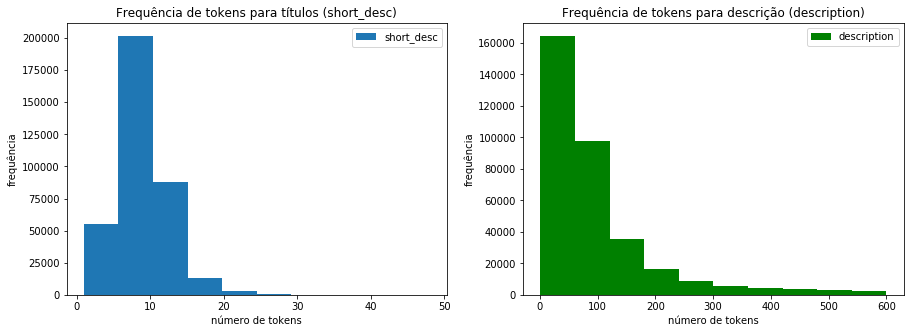

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
# Title
df_title = pd.DataFrame(title_length, columns=['short_desc'])
print(df_title.describe())
ax = df_title.plot.hist(ax=axes[0])
ax.set_title('Frequência de tokens para títulos (short_desc)')
ax.set_ylabel('frequência')
ax.set_xlabel('número de tokens')
# Description
df_desc = pd.DataFrame(description_length, columns=['description'])
print(df_desc.describe())
df_desc = df_desc[df_desc['description'] <= 600]
ax = df_desc.plot.hist(color='g', ax=axes[1])
ax.set_title('Frequência de tokens para descrição (description)')
ax.set_ylabel('frequência')
ax.set_xlabel('número de tokens')

In [15]:
def filter_words(corpus, callback):
    corpus_filtered_words = [row.split(' ') for row in corpus]
    corpus_in_words = []
    for row in corpus_filtered_words:
        corpus_in_words += [word for word in row if callback(len(word))]
    return corpus_in_words

### Word cloud title

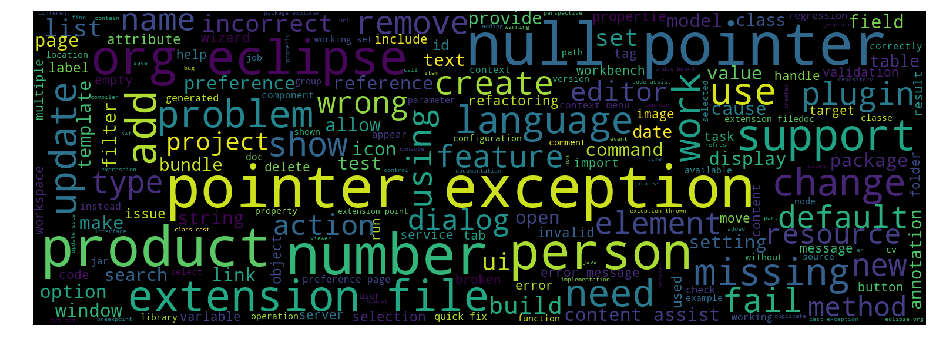

CPU times: user 18.9 s, sys: 372 ms, total: 19.3 s
Wall time: 19.5 s


In [16]:
%%time

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(max_font_size=100,width = 1520, height = 535).generate(" ".join(title_corpus))
plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Word cloud description

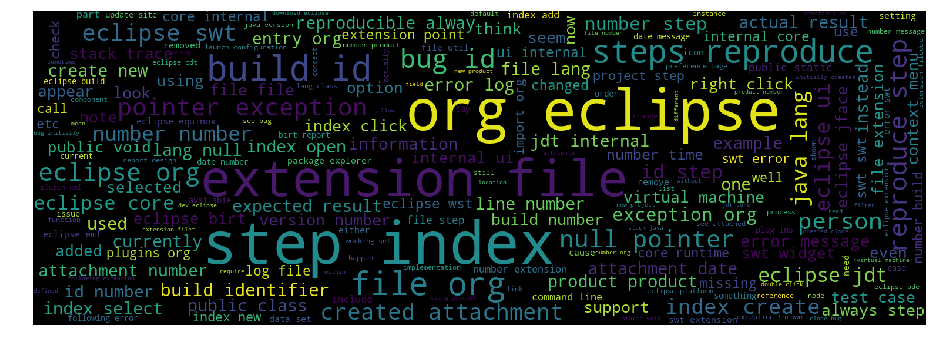

CPU times: user 1min 15s, sys: 1.76 s, total: 1min 16s
Wall time: 1min 16s


In [17]:
%%time

wordcloud = WordCloud(max_font_size=100,width = 1520, height = 535).generate(" ".join(description_corpus))
plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Word cloud 2 words in title

In [18]:
corpus_2_words = [row.split(' ') for row in title_corpus]
title_corpus_2_words = []
for row in corpus_2_words:
    title_corpus_2_words += [word for word in row if len(word) == 2]

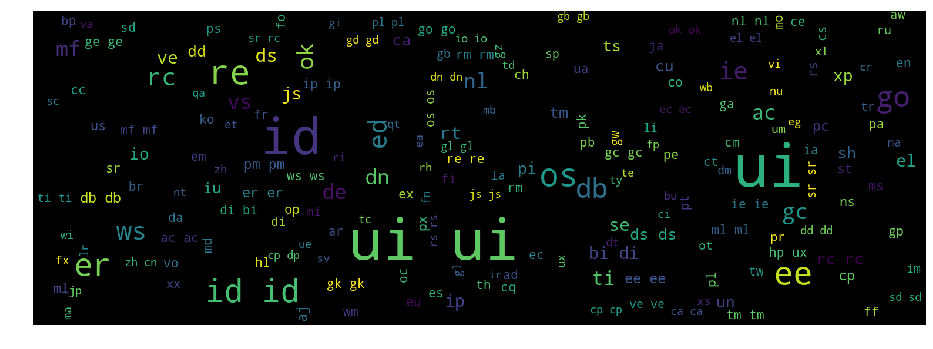

CPU times: user 1.82 s, sys: 88.2 ms, total: 1.9 s
Wall time: 1.83 s


In [19]:
%%time

wordcloud = WordCloud(max_font_size=100,width = 1520, height = 535).generate(' '.join(title_corpus_2_words))
plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Word cloud 2 words in description

In [20]:
corpus_2_words = [row.split(' ') for row in description_corpus]
desc_corpus_2_words = []
for row in corpus_2_words:
    desc_corpus_2_words += [word for word in row if len(word) == 2]

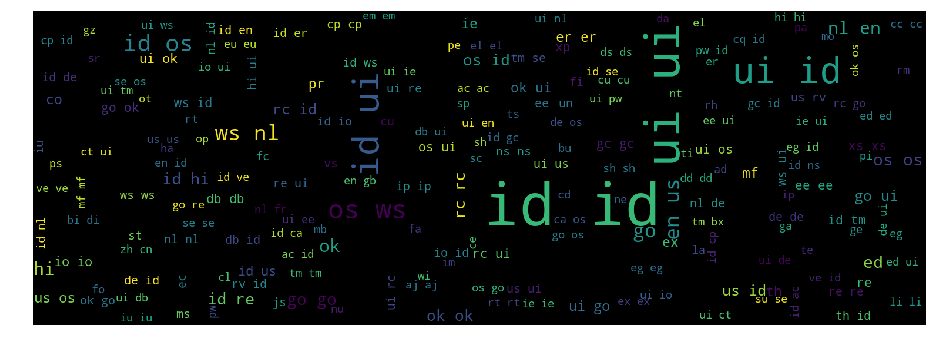

CPU times: user 4.31 s, sys: 84.2 ms, total: 4.4 s
Wall time: 4.35 s


In [21]:
%%time

wordcloud = WordCloud(max_font_size=100,width = 1520, height = 535).generate(' '.join(desc_corpus_2_words))
plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Word cloud 1 word in title

In [22]:
corpus_1_word = [row.split(' ') for row in title_corpus]
title_corpus_1_word = []
for row in corpus_1_word:
    title_corpus_1_word += [word for word in row if len(word) == 1]

In [23]:
freq_words = {}
for word in title_corpus_1_word:
    if word not in freq_words:
        freq_words[word] = 0
        
    freq_words[word] += 1

Text(0.5, 0, 'frequency')

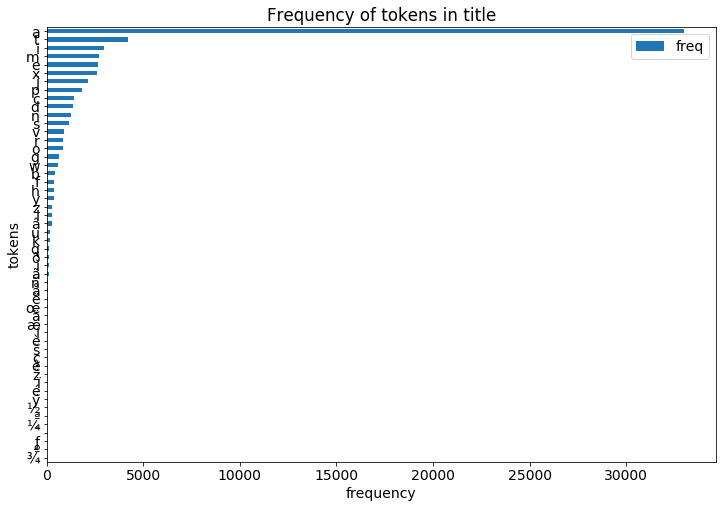

In [24]:
MEDIUM_SIZE = 16
SMALL_SIZE = 14

plt.rc('font', size=SMALL_SIZE)

df = pd.DataFrame(freq_words, columns=list(freq_words), index=range(len(freq_words))).transpose()[[0]]
df.columns = ['freq']
ax = df.sort_values('freq', ascending=True).plot.barh(figsize=(12, 8))
ax.set_title('Frequency of tokens in title')
ax.set_ylabel('tokens')
ax.set_xlabel('frequency')

### Word cloud 1 word in title

In [25]:
corpus_1_word = [row.split(' ') for row in description_corpus]
desc_corpus_1_word = []
for row in corpus_1_word:
    desc_corpus_1_word += [word for word in row if len(word) == 1]

In [26]:
freq_words = {}
for word in desc_corpus_1_word:
    if word not in freq_words:
        freq_words[word] = 0
        
    freq_words[word] += 1

Text(0.5, 0, 'frequency')

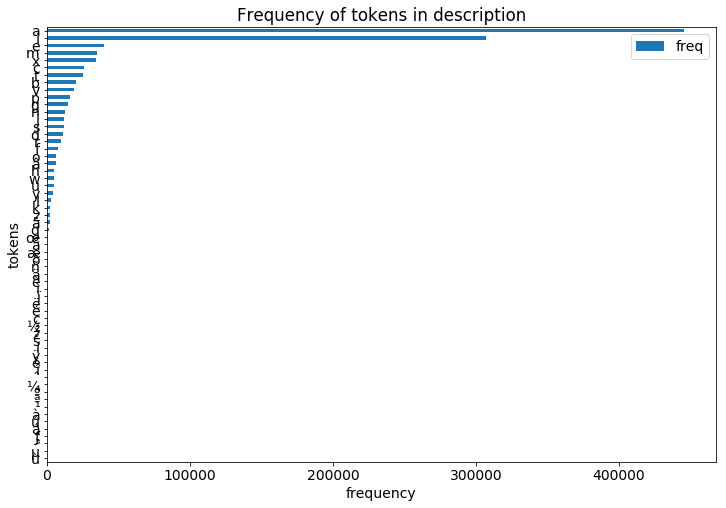

In [27]:
MEDIUM_SIZE = 16
SMALL_SIZE = 14

plt.rc('font', size=SMALL_SIZE)

df = pd.DataFrame(freq_words, columns=list(freq_words), index=range(len(freq_words))).transpose()[[0]]
df.columns = ['freq']
ax = df.sort_values('freq', ascending=True).plot.barh(figsize=(12, 8))
ax.set_title('Frequency of tokens in description')
ax.set_ylabel('tokens')
ax.set_xlabel('frequency')

### Distribution of words in title

In [28]:
dist_word = [row.split(' ') for row in title_corpus]
size_tokens = []
for row in dist_word:
    size_tokens += [len(word) for word in row]

In [29]:
from collections import Counter
freq_tokens = Counter(size_tokens)

Text(0.5, 0, 'token_size')

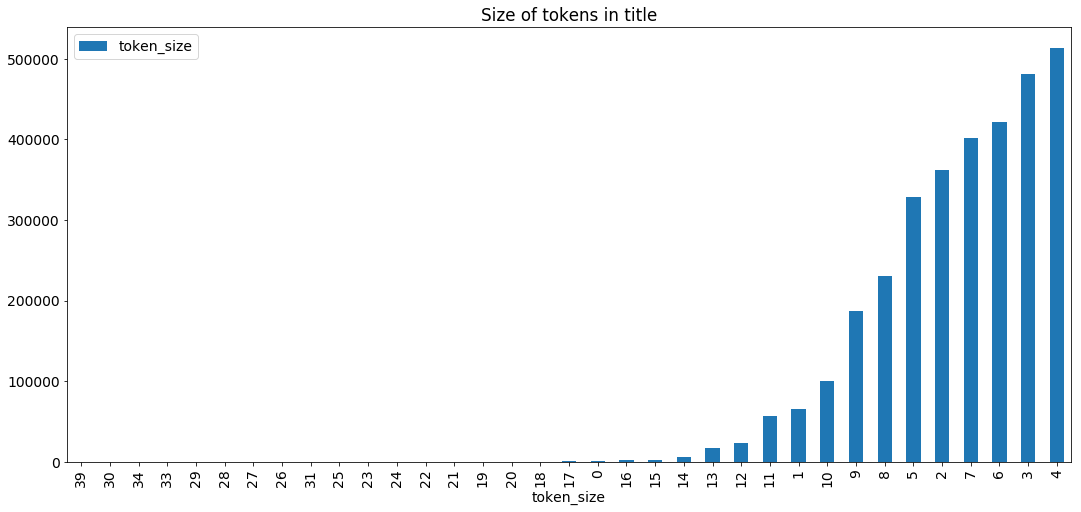

In [30]:
df = pd.DataFrame(freq_tokens, index=range(len(freq_tokens))).transpose()[[0]]
df.columns = ['token_size']
ax = df.sort_values('token_size', ascending=True).plot.bar(figsize=(18, 8))
ax.set_title('Size of tokens in title')
ax.set_xlabel('token_size')

In [31]:
def filter_by_words_title(token_size):
    return token_size == 8

corpus_filtered = filter_words(title_corpus, filter_by_words_title)

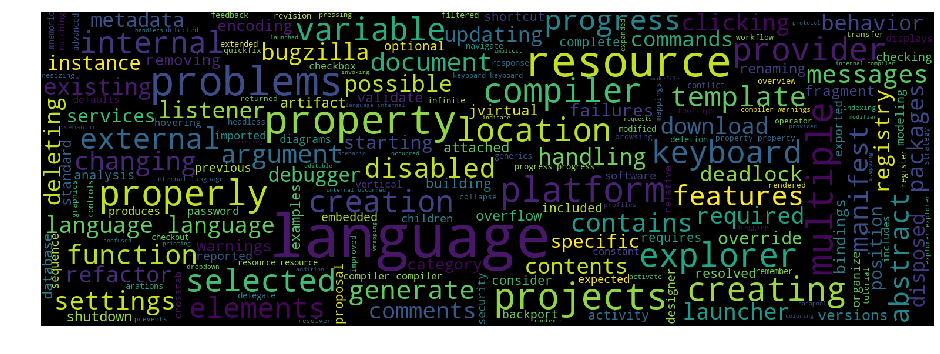

CPU times: user 3.2 s, sys: 92.1 ms, total: 3.29 s
Wall time: 3.24 s


In [32]:
%%time

wordcloud = WordCloud(max_font_size=100,width = 1520, height = 535).generate(' '.join(corpus_filtered))
plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Distribution of words in description

In [33]:
dist_word = [row.split(' ') for row in description_corpus]
size_tokens = []
for row in dist_word:
    size_tokens += [len(word) for word in row]

In [34]:
from collections import Counter
freq_tokens = Counter(size_tokens)

Text(0.5, 0, 'token_size')

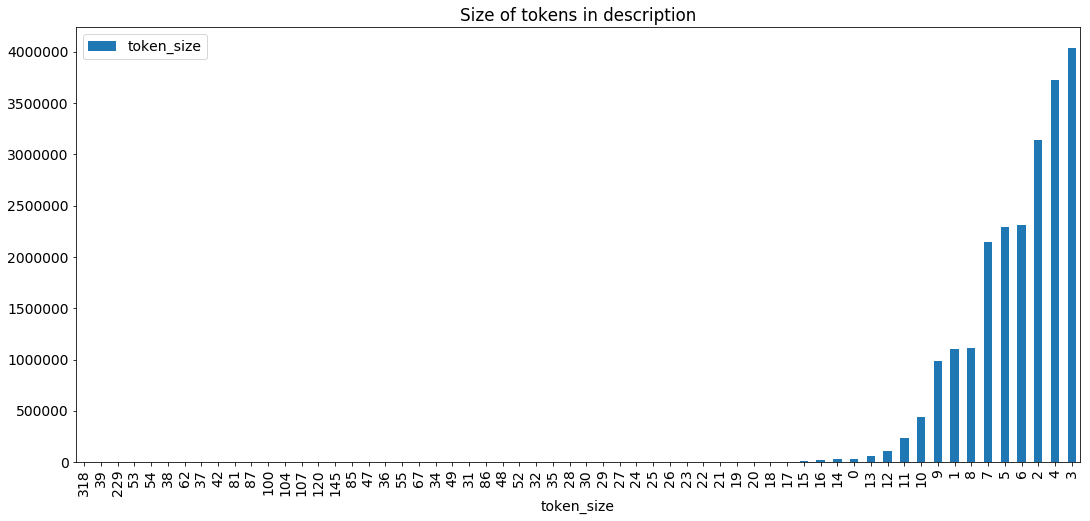

In [35]:
df = pd.DataFrame(freq_tokens, index=range(len(freq_tokens))).transpose()[[0]]
df.columns = ['token_size']
ax = df.sort_values('token_size', ascending=True).plot.bar(figsize=(18, 8))
ax.set_title('Size of tokens in description')
ax.set_xlabel('token_size')

In [36]:
def filter_by_words_title(token_size):
    return token_size == 59

corpus_filtered = filter_words(description_corpus, filter_by_words_title)

In [37]:
' '.join(corpus_filtered)

''

In [38]:
%%time

wordcloud = WordCloud(max_font_size=100,width = 1520, height = 535).generate(' '.join(corpus_filtered))
plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

ValueError: We need at least 1 word to plot a word cloud, got 0.

### Visualize a random bug

In [39]:
bug_selected = np.random.choice(baseline.bug_ids, 1)[0]

bug = baseline.bug_set[bug_selected]

bug

{'bug_severity': '0\n',
 'bug_status': '2\n',
 'component': '437\n',
 'creation_ts': '2009-12-29 17:36:00 -0500',
 'delta_ts': '2009-12-30 05:59:33 -0500',
 'description': 'build identifier m when creating a new java project from existing source if you have a package info extension file file with package level annotations the project is created with incorrect source folder definitions reproducible always steps to reproduce step index unpack the attached archive which contains a trivial project with annotated package info extension file step index in the java perspective menu bar select file new project step index select java project step index select create project from existing source step index select the root directory of the unpacked archive step index click next step index the generated project has number source folders src and src test only src is correct test is a package obviously you can manually fix the project settings but this is confusing especially since you have to remov

#### Total missing values after preprocessing

In [40]:
bugs_empty_desc = [idx for idx in list(baseline.bug_set) if baseline.bug_set[idx]['description'] == '']
bugs_empty_title = [idx for idx in list(baseline.bug_set) if baseline.bug_set[idx]['title'] == '']

In [41]:
len(bugs_empty_title), len(bugs_empty_desc)

(29, 4975)

In [42]:
df = pd.read_csv(DATASET)
df[df['bug_id'].isin(bugs_empty_desc)]

,bug_id,bug_severity,bug_status,component,creation_ts,delta_ts,description,dup_id,priority,product,resolution,short_desc,version
3208,4366,normal,RESOLVED,UI,2001-10-11 08:36:00 -0400,2002-02-12 10:51:00 -0500,,[],P3,JDT,FIXED,Function to reactivate argument hover would be...,2.0
3796,4976,enhancement,CLOSED,Compare,2001-10-15 09:20:00 -0400,2009-08-30 02:21:33 -0400,,[],P3,Platform,WONTFIX,Replace from local history should use a table ...,2.0
3885,5074,normal,RESOLVED,UI,2001-10-18 10:10:00 -0400,2001-10-22 12:35:09 -0400,,[],P3,JDT,WORKSFORME,Problems with editor linking,2.0
4006,5200,normal,RESOLVED,Core,2001-10-24 07:57:00 -0400,2002-01-11 09:08:56 -0500,,[],P3,JDT,FIXED,SetClasspathOperation must close root only whe...,2.0
4533,5739,enhancement,RESOLVED,Build,2001-11-09 16:04:00 -0500,2003-05-13 15:21:53 -0400,,35144,P3,PDE,DUPLICATE,[build] PDE templates don't generate JavaDoc,1.0
4856,6063,normal,VERIFIED,Debug,2001-11-19 09:34:00 -0500,2002-01-21 18:44:31 -0500,,[],P2,JDT,FIXED,Snippet & Display should catch up with changes...,2.0
4869,6076,normal,RESOLVED,UI,2001-11-19 14:03:00 -0500,2002-05-13 11:32:06 -0400,,[],P3,Platform,FIXED,"Problems from first ""no mouse day""",2.0
4881,6088,normal,VERIFIED,Debug,2001-11-19 19:15:00 -0500,2002-01-14 17:13:20 -0500,,[],P2,Platform,FIXED,"Move ""qualified name"" rendering to java debug",2.0
4882,6089,normal,VERIFIED,Debug,2001-11-19 19:47:00 -0500,2002-03-20 19:42:17 -0500,,[],P1,JDT,FIXED,display view code assist cotext should be rece...,2.0
4885,6092,normal,VERIFIED,UI,2001-11-20 06:00:00 -0500,2002-01-15 09:38:07 -0500,,[],P3,JDT,FIXED,JavaEditor should honor the tab width setting ...,2.0


In [43]:
len(bugs_empty_desc) / len(baseline.bug_set) * 100.0

1.3780934388902124